In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

**Data Set Taken from:**
https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope




In [5]:
cols_name = ['fLength', 'fWidth', 'fSize', 'fConc','fConc2','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
dataset=pd.read_csv('/content/magic04.data',names=cols_name)

In [6]:
dataset.head(10)

,fLength,fWidth,fSize,fConc,fConc2,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


**Either use Label Encoding or manually**

In [7]:
#dataset['class'] = (dataset['class'] == 'g').astype(int)
label_end=LabelEncoder()
dataset['class'] = label_end.fit_transform(dataset['class'])

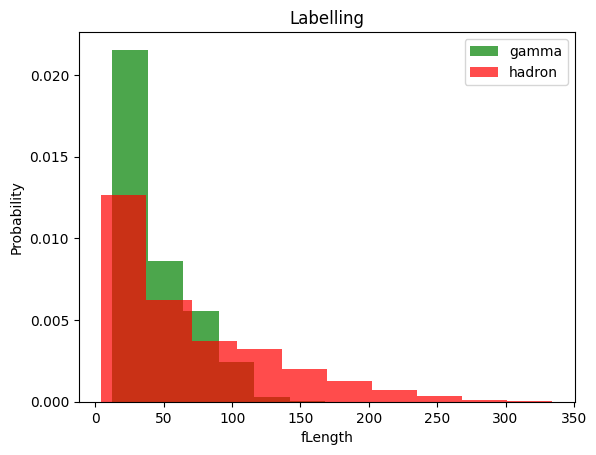

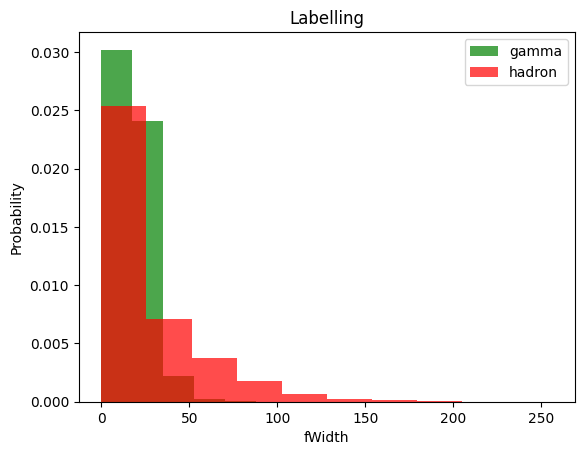

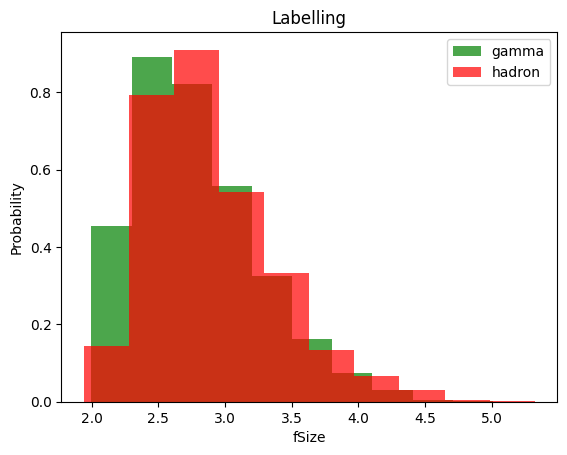

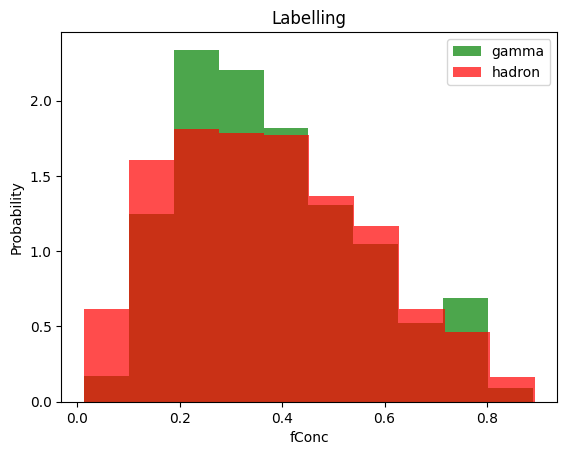

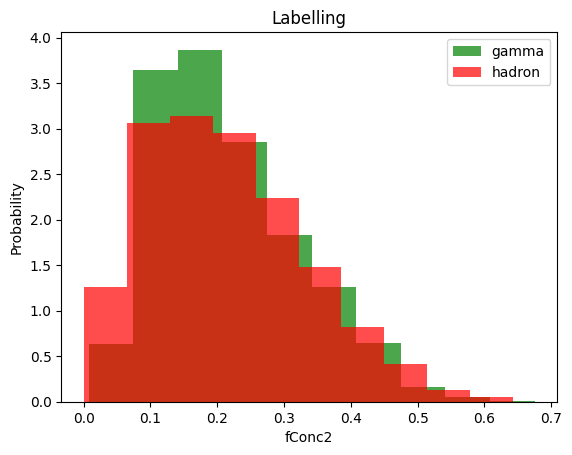

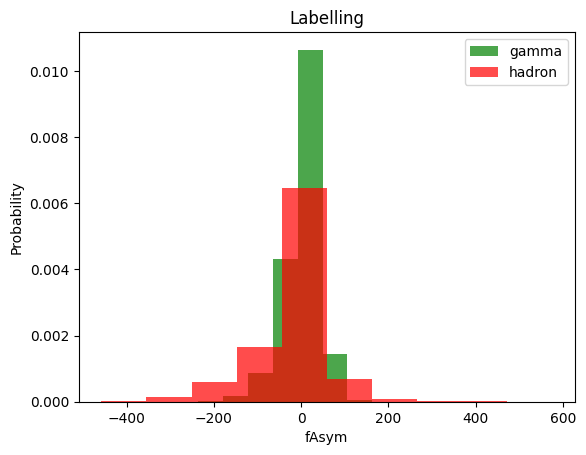

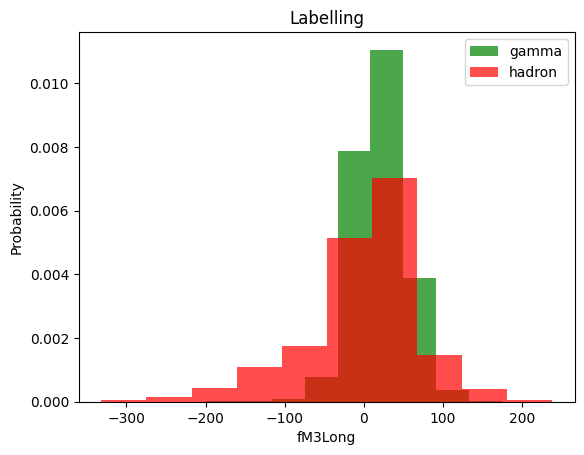

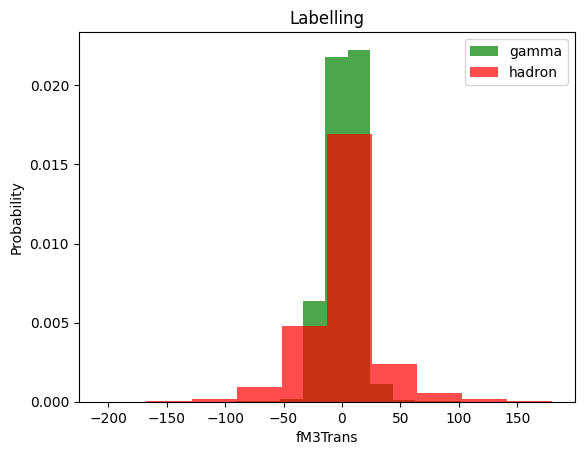

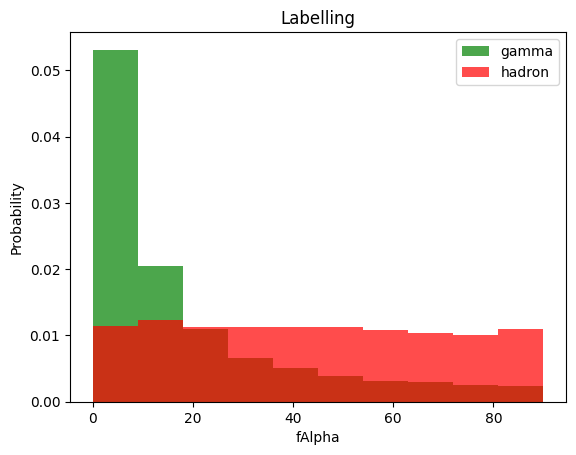

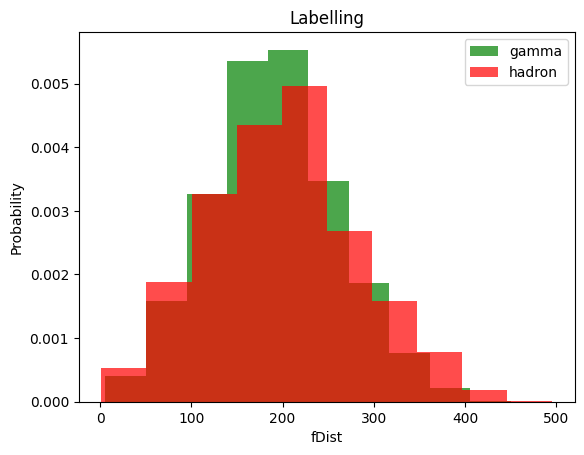

In [8]:
for label in dataset.columns[:-1]:
  plt.hist(dataset[dataset['class'] == 0][label], color='green', alpha=0.7, density=True, label='gamma')
  plt.hist(dataset[dataset['class'] == 1][label], color='red', alpha=0.7, density=True, label='hadron')
  plt.title('Labelling')
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [9]:
x=dataset.drop(['class'],axis=1)
y=dataset['class']
x.shape, y.shape
y.value_counts()
x

,fLength,fWidth,fSize,fConc,fConc2,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


<Axes: ylabel='class'>

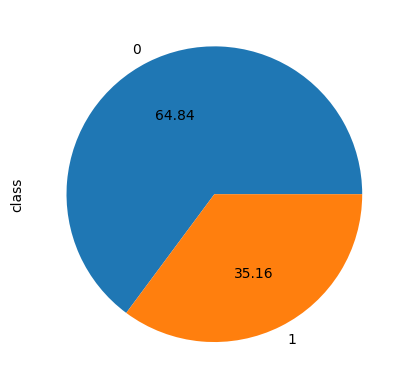

In [10]:
y.value_counts().plot.pie(autopct='%0.2f')

In [11]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.57722602, -0.33680419, -0.38113037, ..., -0.40584194,
         0.47681587, -1.49786555],
       [-0.51096889, -0.57002666, -0.64859479, ..., -0.49009359,
        -0.81541816,  0.15312459],
       [ 2.56827756,  6.20585836,  2.61578306, ..., -2.18302986,
         1.88922413,  0.84263513],
       ...,
       [ 0.52392318,  1.38177927,  1.31887687, ..., -0.4665087 ,
         0.10163583,  0.83900338],
       [ 1.58775746,  2.98278123,  2.47337518, ..., -3.07720555,
         2.18525981,  2.87032093],
       [ 3.16145936,  1.67999288,  0.81314905, ...,  1.49930076,
         0.96101431,  1.05044239]])

In [12]:
ros=RandomOverSampler()
x,y= ros.fit_resample(x,y)

In [13]:
y.value_counts()

0    12332
1    12332
Name: class, dtype: int64

In [14]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

**KNN model**
 





In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=3)
model = knn_model.fit(x_train,y_train)

In [17]:
y_pred = model.predict(x_test)

In [18]:
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [19]:
y_test

15056    1
12729    1
17079    1
10850    0
12663    1
        ..
17281    1
17930    1
17209    1
8293     0
13374    1
Name: class, Length: 7400, dtype: int64

In [20]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3801
           1       0.84      0.85      0.84      3599

    accuracy                           0.85      7400
   macro avg       0.85      0.85      0.85      7400
weighted avg       0.85      0.85      0.85      7400



**Logistic Regression model**

In [21]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
model = lg_model.fit(x_train, y_train)

In [22]:
y_pred = model.predict(x_test)

In [23]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      4092
           1       0.72      0.80      0.76      3308

    accuracy                           0.77      7400
   macro avg       0.77      0.77      0.77      7400
weighted avg       0.78      0.77      0.77      7400



**Supprt Vector Machine**

In [24]:
from sklearn.svm import SVC
svm = SVC()
svm_model = svm.fit(x_train,y_train)

In [25]:
y_pred = svm_model.predict(x_test)

In [26]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4097
           1       0.80      0.88      0.84      3303

    accuracy                           0.85      7400
   macro avg       0.85      0.85      0.85      7400
weighted avg       0.85      0.85      0.85      7400



# **Neural Network**




In [28]:
import tensorflow as tf
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]);

nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=['binary_crossentropy'],
    metrics=['accuracy']);


In [30]:
history = nn_model.fit(x_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
432/432 [==============================] - 4s 4ms/step - loss: 0.4616 - accuracy: 0.7802 - val_loss: 0.4025 - val_accuracy: 0.8248
Epoch 2/150
432/432 [==============================] - 1s 2ms/step - loss: 0.3893 - accuracy: 0.8285 - val_loss: 0.3760 - val_accuracy: 0.8338
Epoch 3/150
432/432 [==============================] - 1s 2ms/step - loss: 0.3671 - accuracy: 0.8387 - val_loss: 0.3598 - val_accuracy: 0.8361
Epoch 4/150
432/432 [==============================] - 1s 3ms/step - loss: 0.3560 - accuracy: 0.8451 - val_loss: 0.3552 - val_accuracy: 0.8361
Epoch 5/150
432/432 [==============================] - 1s 3ms/step - loss: 0.3488 - accuracy: 0.8490 - val_loss: 0.3516 - val_accuracy: 0.8361
Epoch 6/150
432/432 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8453 - val_loss: 0.3456 - val_accuracy: 0.8425
Epoch 7/150
432/432 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8498 - val_loss: 0.3446 - val_accuracy: 0.8474

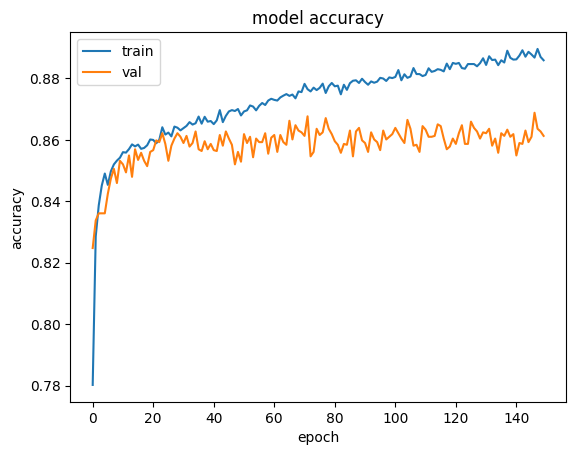

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
y_pred = nn_model.predict(x_test)

232/232 [==============================] - 0s 1ms/step
